The dataset coitains single row with wavelength and multiple ones with flux associated with them:

In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("quasar_train.csv", header=None)
test = pd.read_csv("quasar_test.csv", header=None)
train

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
0,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
1,0.629,1.910,0.976,2.161,0.964,2.068,1.630,1.716,2.378,-0.540,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.450,0.203,0.382
2,-0.161,1.830,0.609,1.932,0.932,0.857,0.978,1.032,1.793,1.455,...,0.961,1.407,1.296,0.943,1.055,2.265,1.053,1.439,0.767,-0.552
3,-0.085,-1.304,0.691,-0.800,-1.090,1.087,0.734,1.198,1.122,0.742,...,0.447,1.139,0.422,1.248,1.047,0.500,1.514,1.623,1.202,0.924
4,1.283,-0.487,0.660,0.167,-1.217,1.535,2.264,0.220,0.865,-0.723,...,0.714,1.173,1.579,0.477,0.781,0.525,2.466,1.493,1.503,0.698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.541,1.128,0.309,1.549,2.142,0.573,0.861,-0.064,0.946,0.827,...,2.455,0.949,1.463,0.870,1.053,1.211,1.230,0.865,0.792,0.635
197,1.237,0.712,1.407,1.155,-0.538,-1.360,2.321,1.598,1.449,1.684,...,1.029,1.205,1.121,1.341,1.769,0.701,0.635,0.723,0.622,0.348
198,0.212,0.102,0.452,2.887,3.236,0.674,-1.290,0.954,0.795,0.976,...,1.053,1.517,1.491,1.546,0.777,0.469,1.949,1.018,0.671,0.538
199,0.193,1.063,0.292,0.699,-1.152,1.738,1.987,1.434,3.078,0.784,...,0.907,1.004,0.427,1.216,1.216,1.962,1.421,0.612,0.847,1.000


### First sample's linear regression:

Intercept: 2.513399055600274
Bias: -0.0009811221454591535


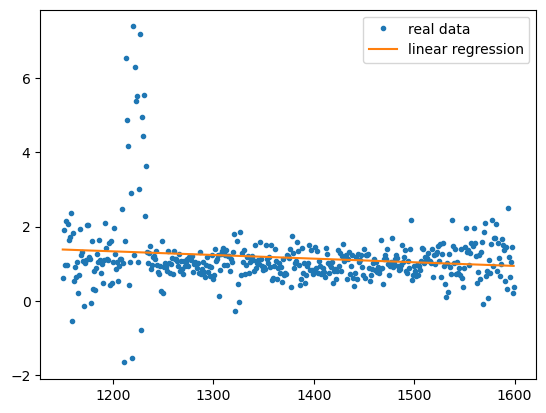

In [2]:
X = np.array(train.iloc[0, :])
y = np.array(train.iloc[1, :])

from linear_regression_normal_equation import LinearRegressionNormalEquation
lr = LinearRegressionNormalEquation()
lr.fit(X, y)

print("Intercept: " + str(lr._beta[0]) + "\nBias: " + str(lr._beta[1]))

import matplotlib.pyplot as plt
plt.plot(X, y, '.', label="real data")
plt.plot(X, lr.predict(X), label="linear regression")
plt.legend()
plt.show()

### First sample's locally weighted linear regression

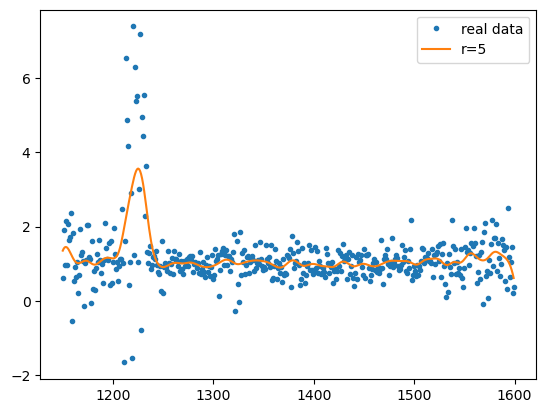

In [3]:
from locally_weighted_linear_regression_normal_equation import LocallyWeightedLinearRegressionNormalEquation

wlr = LocallyWeightedLinearRegressionNormalEquation()

def weight_expression(r):
    return lambda x_single, X: np.exp(- (np.square(x_single - X)/(2 * np.square(r))))

import matplotlib.pyplot as plt
plt.plot(X, y, '.', label="real data")
wlr.fit(X, y, weight_expression(5))
plt.plot(X, wlr.predict(X), label="r=5")
plt.legend()
plt.show()

### Locally weighted linear regression with various 'r' parameter:

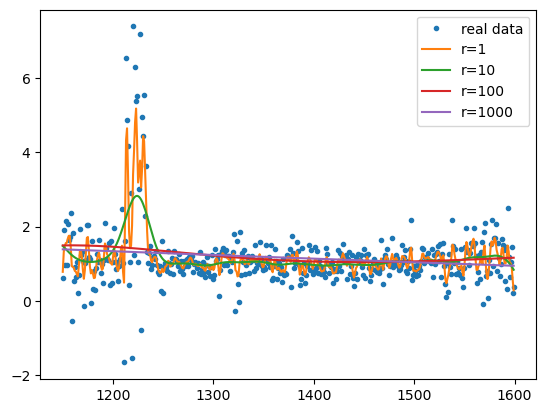

In [4]:
plt.plot(X, y, '.', label="real data")

for r in [1, 10, 100, 1000]:
    wlr.fit(X, y, weight_expression(r))
    plt.plot(X, wlr.predict(X), label="r="+str(r))
    plt.legend()
plt.show()

### Smooth data usign locally weigted linear regression with r=5

In [5]:
X = np.array(train.iloc[0, :])

result = [X]
for row in range(1, 201):
    y = np.array(train.iloc[row, :])
    wlr.fit(X, y, weight_expression(5))
    prediction = wlr.predict(X)
    result += [prediction]
    
pd.DataFrame(result).to_csv("quasar_train_smoothed.csv", index=False, header=False)

In [6]:
X = np.array(test.iloc[0, :])

result = [X]
for row in range(1, 51):
    y = np.array(test.iloc[row, :])
    wlr.fit(X, y, weight_expression(5))
    prediction = wlr.predict(X)
    result += [prediction]

pd.DataFrame(result).to_csv("quasar_test_smoothed.csv", index=False, header=False)

### Helper methods for loading smoothed data

In [7]:
def get_train():
    return pd.read_csv("quasar_train_smoothed.csv", header=None)

def get_train_right():
    return get_train().iloc[1:, 150:]

def get_train_left():
    return get_train().iloc[1:, :50]

def get_test():
    return pd.read_csv("quasar_test_smoothed.csv", header=None)

def get_test_right():
    return get_test().iloc[1:, 150:]

def get_test_left():
    return get_test().iloc[1:, :50]

### Helper methods for functional regression

In [8]:
def distance(spectrum1, spectrum2):
    s1_np = np.array(spectrum1)
    s2_np = np.array(spectrum2)
    return np.sum(np.square(s1_np-s2_np))

vdistance = np.vectorize(distance, signature='(n),(n)->()')

def knn_indicies_l(sample, all_spectra, k):
    return vdistance(sample, all_spectra).argsort()[:k]

def knn_indicies(sample, k):
    return vdistance(sample, get_train_right()).argsort()[:k]

def ker(t):
    return max(1-t, 0)

def h_l(sample, all_spectra):
    return max(vdistance(sample, all_spectra))

def h(sample):
    return max(vdistance(sample, get_train_right()))

def sample_wavelength(sample_left, wavelength):
    return sample_left.iloc[wavelength-1150]

### Model implementation

In [9]:
def estimate_sample_wavelength(sample_right, wavelength, train_right, train_left):
    knn_idx = knn_indicies_l(sample_right, train_right, 3)
    numerator = 0
    denominator = 0
    for idx in knn_idx:
        numerator += ker(distance(train_right.iloc[idx], sample_right)/h_l(sample_right, train_right)) * sample_wavelength(train_left.iloc[idx], wavelength)
        denominator += ker(distance(train_right.iloc[idx], sample_right)/h_l(sample_right, train_right))

    return numerator/denominator

def estimate_sample_left(sample_right):
    train_right = get_train_right()
    train_left = get_train_left()
    return [estimate_sample_wavelength(sample_right, wavelength, train_right, train_left) for wavelength in range(1150, 1200)]

def estimate_left(X_right):
    return [estimate_sample_left(sample_right) for sample_right in X_right]

### Predictions

In [10]:
predictions_train = estimate_left(get_train_right().values)
predictions_test = estimate_left(get_test_right().values)

### Calculation mean error

In [11]:
np_pred_train = np.array(predictions_train)
np_train_left = get_train_left().values

row_number = np_train_left.shape[0]
column_number = np_train_left.shape[1]

distances = []
for row_idx in range(row_number):
    distances += [sum([distance(np_pred_train[row_idx, col_idx], np_train_left[row_idx, col_idx]) for col_idx in range(column_number)])]

print("Mean error for train dataset: " + str(np.mean(distances)))



np_pred_test = np.array(predictions_test)
np_test_left = get_test_left().values

row_number = np_test_left.shape[0]
column_number = np_test_left.shape[1]

distances = []
for row_idx in range(row_number):
    distances += [sum([distance(np_pred_test[row_idx, col_idx], np_test_left[row_idx, col_idx]) for col_idx in range(column_number)])]

print("Mean error for test dataset: " + str(np.mean(distances)))

Mean error for train dataset: 1.066395802355828
Mean error for test dataset: 2.709969579360262


### Prediction visualization

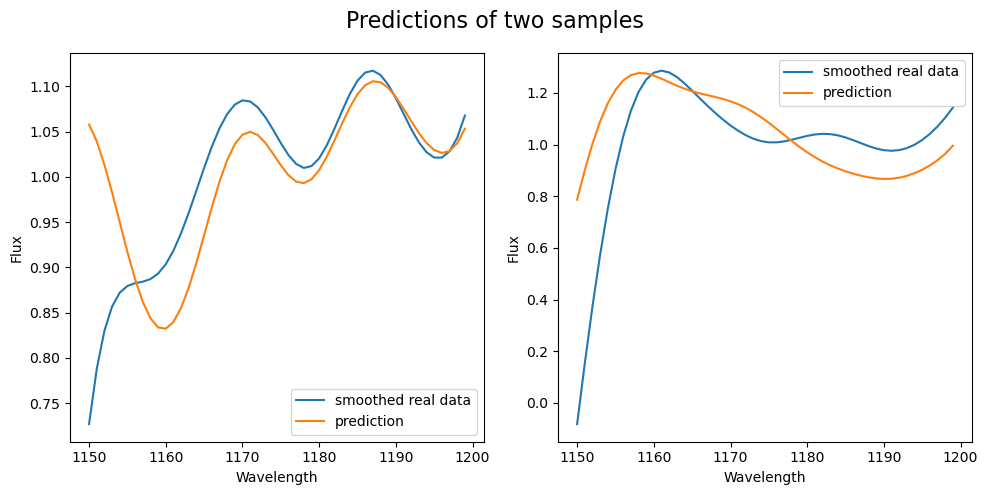

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle('Predictions of two samples', fontsize=16)
axes[0].plot(range(1150, 1200), np_test_left[0], label="smoothed real data")
axes[0].plot(range(1150, 1200), np_pred_test[0], label="prediction")
axes[0].set_xlabel("Wavelength")
axes[0].set_ylabel("Flux")
axes[0].legend()

axes[1].plot(range(1150, 1200), np_test_left[5], label="smoothed real data")
axes[1].plot(range(1150, 1200), np_pred_test[5], label="prediction")
axes[1].set_xlabel("Wavelength")
axes[1].set_ylabel("Flux")
axes[1].legend()
fig.tight_layout()